Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



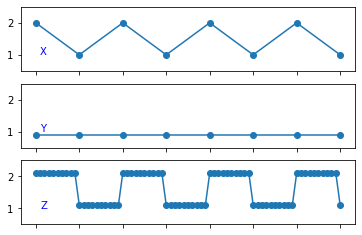

In [1]:
import numpy as np
import dtw
import matplotlib.pyplot as plt

mul = 10
X = np.array([2,1,2,1,2,1,2,1])
Y = np.array([1,1,1,1,1,1,1,1]) - 0.1
Z = np.array([mul*[x + 0.1] for x in X]).reshape(-1)
xs_Z = np.array(range(len(Z)))
xs_XY = xs_Z[::mul]
Z = Z[:-(mul-1)]
xs_Z = xs_Z[:-(mul-1)]
xs = [xs_XY, xs_XY, xs_Z]
ys = [X,Y,Z]
names = ["X", "Y", "Z"]

fig,ax = plt.subplots(3,1, sharex = True, sharey = True)
for i in [0,1,2]:
    ax[i].scatter(xs[i], ys[i])
    ax[i].plot(xs[i], ys[i])
    ax[i].set_ylim(0.5, 2.5)
    ax[i].xaxis.set_ticklabels([])
    ax[i].text(1, 1, names[i], color = "blue")

plt.savefig("./unnormalized_dtw.png")
plt.show()

In [2]:
xy = dtw.dtw(X,Y)
xz = dtw.dtw(X,Z)

def summary(dtw_):
    return {
        "d_un": round(dtw_.distance, 2),
        "d_no": round(dtw_.normalizedDistance, 2),
        "len": len(dtw_.index1)}

print("dtw(X,Y): ", summary(xy))
print("dtw(X,Z): ", summary(xz))
# xz.distance/len(xz.stepsTaken) - xz.normalizedDistance
# xz.__dict__

dtw(X,Y):  {'d_un': 5.5, 'd_no': 0.34, 'len': 15}
dtw(X,Z):  {'d_un': 7.8, 'd_no': 0.1, 'len': 71}


In [9]:
xy.distance/(xy.N + xy.M) - xy.normalizedDistance

0.0